In [103]:
# bring in lots of stuff

# dataset creator
import sklearn.datasets as data
from sklearn.model_selection import KFold

# plotting stuff
import matplotlib.pyplot as plt

# modeling stuff
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# keep plots in the notebook
%matplotlib inline

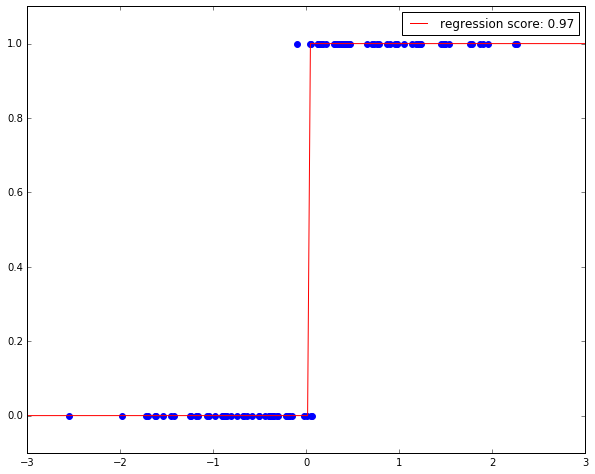

In [71]:
# create single feature regression data
X,y,coef = data.make_regression(n_samples=100, n_features=1, random_state=0, noise=4.0, bias=100.0, coef=True)
maxY = max(y)

# trickery to turn the linear result into a 0/1 result
y = y > maxY/2

# solve the model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X,y)

X_test = np.linspace(-3, 3, 200)
X_test = X_test[:,np.newaxis]
result = model.predict(X_test)

# draw a pretty picture
plt.figure(figsize=(10,8))
# bound axis for prettyness
plt.xlim((-3, 3))
plt.ylim((-.1, 1.1))
plt.scatter(X, y, color='b', s=35)
plt.plot(X_test,result,'r', label="regression score: "+ str(model.score(X,y)))
plt.legend(loc="best")
plt.show()

In [126]:
# create double feature regression data
X,y,coef = data.make_regression(n_samples=200, n_features=2, random_state=0, noise=4.0, bias=100.0, coef=True)
maxY = max(y)

# trickery to turn the linear result into a 0/1 result
y = np.where(y > maxY/2, 1, 0)

# Split the features into a training and holdout set. 
# If we only predict on the test we get 100% accuracy which is just wrong
k_fold = KFold(n_splits=2)
train_indices, test_indices = k_fold.split(X)

# fit on the training
model = linear_model.LogisticRegression(C=1e5)
model.fit(X[train_indices[0]], y[train_indices[0]])

# predict on the test
result = model.predict(X[test_indices[0]])

# how did we do? .96 not bad
score = model.score(X[test_indices[0]],y[test_indices[0]])
print(score)

# where did we go wrong?
wrong = np.where(result != y[test_indices[0]])

0.96


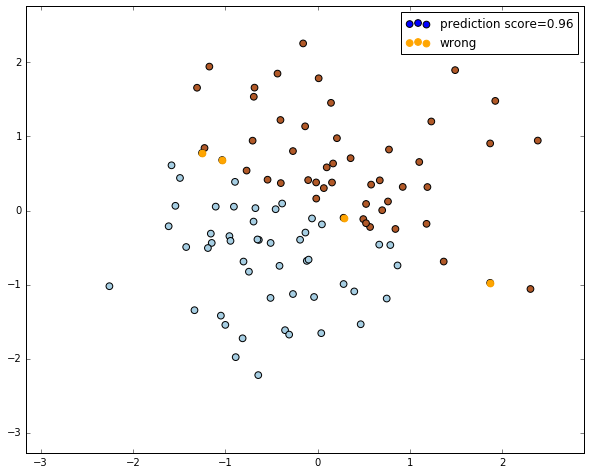

In [127]:
# plotting 
# draw a pretty picture
plt.figure(figsize=(10,8))
# bound axis a little beyond the max for prettyness
plt.xlim(min(X[:,0]) - .5, max(X[:,0]) + .5)
plt.ylim(min(X[:,1]) - .5, max(X[:,1]) + .5)

# plot
# c=result allows for the color to be based off of the regression result
plt.scatter(X[test_indices[0], 0], X[test_indices[0], 1], c=result, edgecolors='black', s=45, cmap=plt.cm.Paired, label="prediction score=" + str(score))

# add in where we went wrong :(
plt.scatter(X[wrong, 0], X[wrong, 1], color="orange", s=45, label="wrong")
plt.legend(loc="best")

plt.show()

In [144]:
def multi_feature_charting(x1, x2, actuals, prediction, score):
    plt.figure(figsize=(10,8))
    # bound axis a little beyond the max for prettyness
    plt.xlim(min(x1) - .5, max(x1) + .5)
    plt.ylim(min(x2) - .5, max(x2) + .5)

    # plot the known values from the test set
    plt.scatter(x1, x2, c=actuals, edgecolors='black', s=45, cmap=plt.cm.Paired, label="true basis")
    plt.legend(loc="best")

    # plot our prediction
    plt.figure(figsize=(10,8))
    # c=result allows for the color to be based off of the regression result
    plt.scatter(x1, x2, c=actuals, edgecolors='black', s=45, cmap=plt.cm.Paired, label="true basis")
    plt.scatter(x1, x2, c=prediction, edgecolors='black', s=45, cmap=plt.cm.Paired, label="prediction score = " + str(score))

    plt.legend(loc="best")

    # plot where we went wrong
    plt.figure(figsize=(10,8))
    # c=result allows for the color to be based off of the regression result
    plt.scatter(x1, x2, c=prediction, edgecolors='black', s=45, cmap=plt.cm.Paired, label="prediction score = " + str(score))

    # add in where we went wrong :(
    wrong = np.where(prediction != actuals)
    plt.scatter(x1[wrong], x2[wrong], color="orange", s=45, label="wrong guesses")
    plt.legend(loc="best")

    plt.show()

In [147]:
# create double feature regression data
X,y,coef = data.make_regression(n_samples=200, n_features=2, random_state=0, noise=4.0, bias=100.0, coef=True)
maxY = max(y)

# trickery to turn the linear result into a 0/1 result
y = np.logical_and(y>maxY/3,y<2*maxY/3)

# Split the features into a training and holdout set. 
# If we only predict on the test we get 100% accuracy which is just wrong
k_fold = KFold(n_splits=2)
train_indices, test_indices = k_fold.split(X)

train_data = X[train_indices[0]]
train_results = y[train_indices[0]]
test_data = X[test_indices[0]]
test_results = y[test_indices[0]]


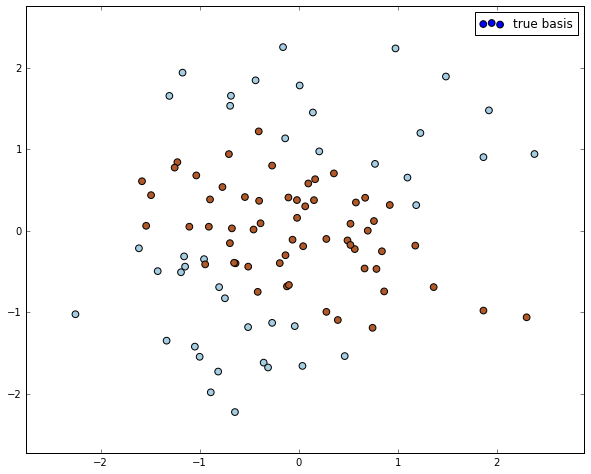

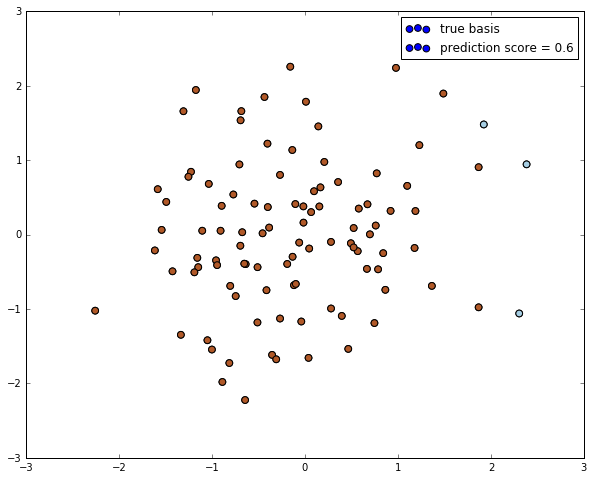

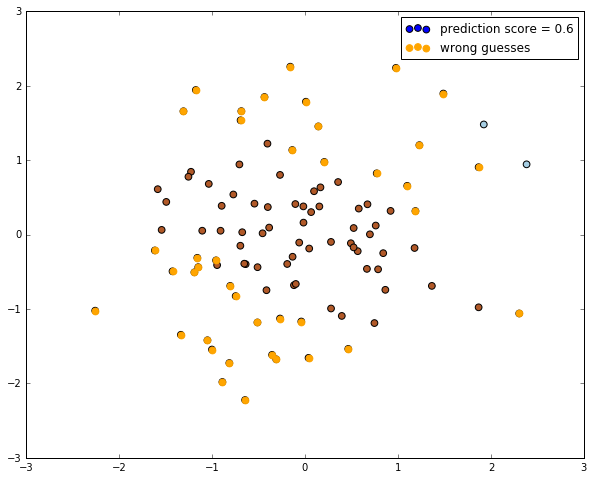

In [148]:
# fit on the training
model = linear_model.LogisticRegression(C=1e5)
model.fit(train_data, train_results)

# predict on the test
prediction = model.predict(test_data)

# how did we do? not great...
score = model.score(test_data,test_results)

multi_feature_charting(test_data[:,0],test_data[:,1],test_results,prediction,score)

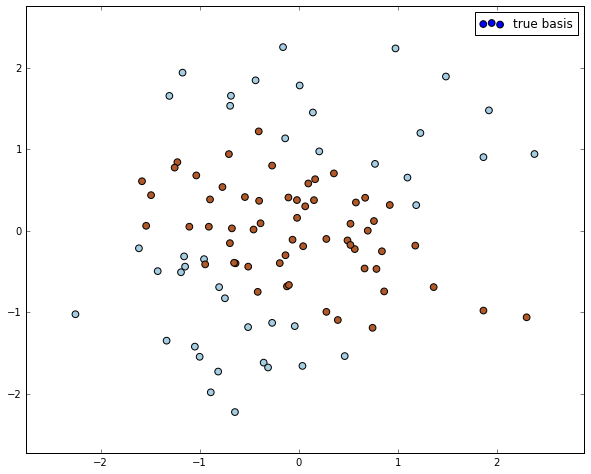

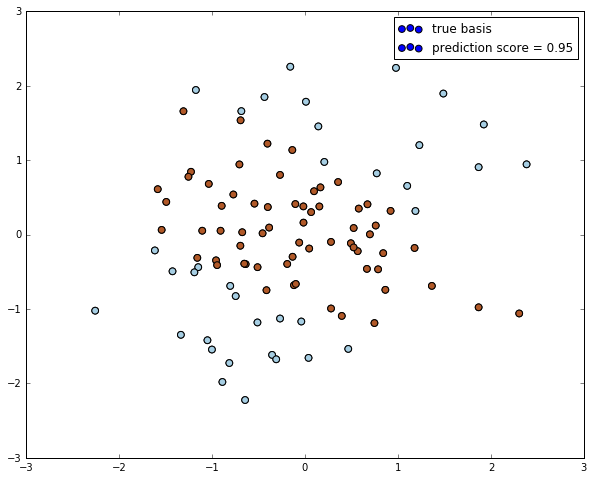

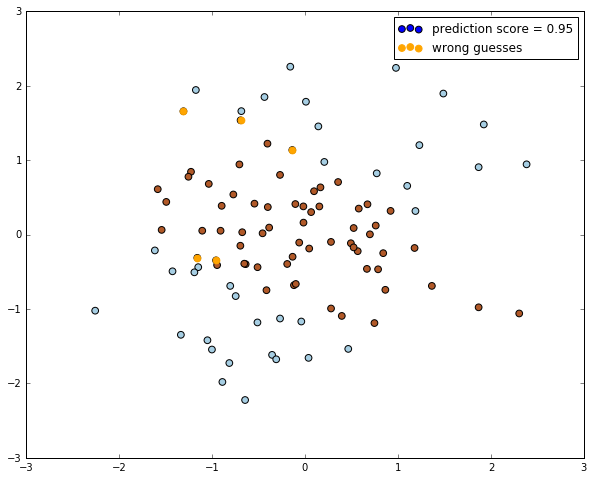

In [146]:
# well that didn't work at all. What about adding some polynomial attributes?
model = make_pipeline(PolynomialFeatures(2, include_bias=False), linear_model.LogisticRegression())
model.fit(train_data, train_results)

# predict on the test
prediction = model.predict(test_data)

# how did we do? Much better!!
score = model.score(test_data, test_results)

multi_feature_charting(test_data[:,0],test_data[:,1],test_results,prediction,score)